In [1]:
%matplotlib notebook
# starter code
import random
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
from graph_tool.all import load_graph, shortest_distance, GraphView, pbfs_search, BFSVisitor, Graph, min_spanning_tree
from networkx.drawing.nx_agraph import graphviz_layout

from cascade import gen_nontrivial_cascade
from utils import get_rank_index

seed = 123456
random.seed(seed)
np.random.seed(seed)

gtype = 'grid'
g = load_graph('data/{}/2-6/graph.gt'.format(gtype))
gnx = nx.read_graphml('data/{}/2-6/graph.graphml'.format(gtype))
gnx = nx.relabel_nodes(gnx, {i: int(i) for i in gnx.nodes_iter()})
N1, N2 = 100, 100
p, q = 0.5, 0.95

pos = graphviz_layout(gnx, root=0)

In [2]:
from steiner_tree_mst import steiner_tree_mst

In [3]:
from utils import earliest_obs_node
from tqdm import tqdm
from feasibility import is_order_respected, is_feasible
# from steiner_tree_region_mst import steiner_tree_region_mst

for i in tqdm(range(10)):
    infection_times, source, obs_nodes, true_tree = gen_nontrivial_cascade(g, p, q, model='si', return_tree=True)
    root = earliest_obs_node(obs_nodes, infection_times)

    tree, gc, mst_tree = steiner_tree_mst(
        g, root, infection_times, source, obs_nodes,
        strictly_smaller=False,
        debug=False,
        verbose=False,
        return_closure=True
    )
    assert is_order_respected(tree, root, obs_nodes, infection_times)
    assert is_feasible(tree, root, obs_nodes, infection_times)

100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


<IPython.core.display.Javascript object>


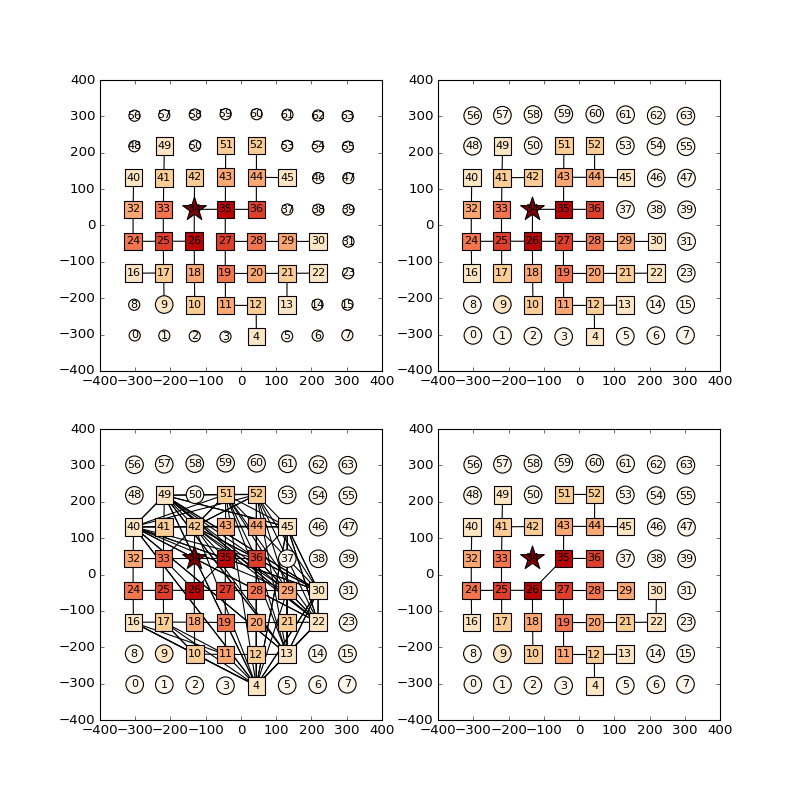

In [4]:
from plot_utils import plot_snapshot
from utils import extract_edges

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[0, 0],
              edges=extract_edges(true_tree))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
             ax=ax[0, 1], arrows=True,
             edges=extract_edges(tree))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[1, 0], arrows=True,
              edges=extract_edges(gc))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[1, 1], arrows=True,
              edges=extract_edges(mst_tree))

In [ ]:
list(mst_tree.edges())

In [ ]:
original_tree, gc, mst_tree = steiner_tree_mst(g, source, 
                                               infection_times, source, 
                                               list(obs_nodes), return_closure=True, debug=True)

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[0, 0],
              edges=extract_edges(true_tree))
ax[0, 0].set_title('cascade tree')
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[0, 1],
              arrows=True,
              edges=extract_edges(gc))
ax[0, 1].set_title('closure graph')
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[1, 0],
              arrows=True,
              edges=extract_edges(mst_tree))
ax[1, 0].set_title('spanning tree on closure graph')
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[1, 1],
              arrows=True,              
              edges=extract_edges(original_tree))
ax[1, 1].set_title('steiner tree on original graph: m={}'.format(original_tree.num_edges()))

In [ ]:
%%timeit -r1 -n1
from steiner_tree_order import tree_sizes_by_roots
from utils import get_rank_index
sizes = tree_sizes_by_roots(g, obs_nodes, infection_times, source, method='mst')
get_rank_index(sizes, source)